<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/draft-day13/tutorials/W3D3-Linear_Dynamical_Systems/TA_solutions/W3D3-Linear_Dynamical_Systems_Tutorial1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is no longer the active version and will no longer be updated; please see the most recent version.

## Neuromatch Academy 2020, W2D2: Linear dynamical systems

**DRAFT: 2020-06-11**, Bing Wen Brunton

with contributions by Alice Schwarze, Ellie Strandquist

### Tutorial 1: Deterministic systems with linear dynamics

In this tutorial, we will be learning about behavior of dynamical systems -- systems that evolve in time -- where the rules by which they evolve in time are described precisely by a differential equation.

Differential equations are equations that express the **rate of change** of the state variable $x$. One typically describes this rate of change using the derivative of $x$ with respect to time ($dx/dt$) on the left hand side of the differential equation,

$\frac{dx}{dt} = f(x)$.

A common notational short-hand is to write $\dot{x}$ for $\frac{dx}{dt}$. The dot means ''derivative with respect to time''.

Today, the focus will be on **linear dynamics**, where $f(x)$ is a linear function of $x$. 

Our goals are to explore and understand the behavior of such systems where $x$ is a single variable, then consider cases where $\mathbf{x}$ is a state vector representing two variables. 

#### Imports and plot configurations

In [0]:
# @title
import numpy as np                 # import numpy

import matplotlib.pyplot as plt    # import matplotlib

# set figure size
fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
# plt.style.use('ggplot')

%matplotlib inline

#### Part A: One-dimensional differential equations

Let's start by reminding ourselves of a one-dimensional differential equation in $x$ of the form 

$\dot{x} = a x$, 

where $a$ is a scalar. 

Solutions for how $x$ evolves in time when its dynamics are governed by such a differential equation take the form

$x(t) = x_0\exp(a t)$,

where $x_0$ is the **initial condition** of the equation -- that is, the value of $x$ at time $0$.

To gain further intuition, let's explore the behavior of such systems with a simple simulation of the system.

Text(0, 0.5, 'x')

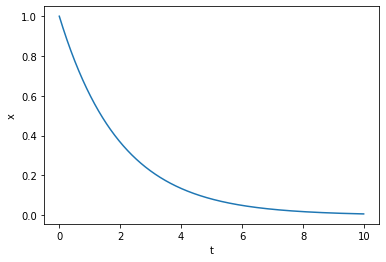

In [0]:
# parameters
a = -0.5    # parameter in f(x)
T = 10      # total Time duration
dt = 0.01   # timestep of our simulation
x0 = 1.     # initial condition of x at time 0

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
x[0] = x0

# Integrate:
# step through system and integrate in time
# note: this is the simplest possible numerical integration
#       scheme and is an approximate solution for x(t)
for k in range(1, len(t)):
    # for each point in time, compute xdot = a*x
    xdot = (a*x[k-1])

    # update x by adding xdot scaled by dt
    x[k] = x[k-1] +  xdot * dt

# plot x as it evolves in time 
plt.plot(t, x)    
plt.xlabel('t')
plt.ylabel('x')

**EXERCISE**: What happens when you change $a$? Try values where $a<0$ and $a>0$.

####Part B: Oscillatory dynamics

Now let's explore what happens when $a$ is a complex number and has a non-zero imaginary component.

Text(0, 0.5, 'x')

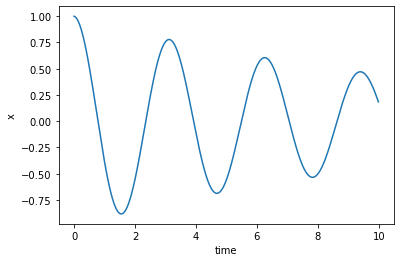

In [0]:
# parameters
a = -0.1 + 2j  # parameter in f(x)
T = 10         # total Time duration
dt = 0.01      # timestep of our simulation
x0 = 1.        # initial condition of x at time 0

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t, dtype=complex)
x[0] = x0

# step through system in time
for k in range(1, len(t)):
    # for each point in time, compute xdot = a*x
    xdot = (a*x[k-1])
    
    # update x by adding xdot scaled by dt
    x[k] = x[k-1] +  xdot * dt

# plot the real part of x as x evolves in time 
plt.plot(t, np.real(x))    
plt.xlabel('time')
plt.ylabel('x')

**EXERCISE**: See what values of $a$ produce dynamics that both ***oscillate*** and ***grow***.

---



####Part C: Deterministic linear dynamics in 2 dimensions

Adding one additional variable (or _dimension_) adds more variety of behaviors. Additional variables are useful in modeling the dynamics of more complex systems with richer behaviors, such as systems of multiple neurons. We can write such a system using two linear ordinary differential equations:

$\dot{x_1} = {a}_{11} x_1$,

$\dot{x_2} = {a}_{22} x_2$.

So far, this system consists of two variables (e.g. neurons) in isolation. To make things interesting, we can add interaction terms:

$\dot{x_1} = {a}_{11} x_1 + {a}_{12} x_2$,

$\dot{x_2} = {a}_{21} x_1 + {a}_{22} x_2$.

We can write the two equations that describe our system as one (vector-valued) linear ordinary differential equation:

$\dot{\mathbf{x}} = \mathbf{A} \mathbf{x}$.

For two-dimensional systems, $\mathbf{x}$ is a vector with 2 elements ($x_1$ and $x_2$) and $\mathbf{A}$ is a $2 \times 2$ matrix with $\mathbf{A}=\bigg[\begin{array} & a_{11} & a_{12} \\ a_{21} & a_{22} \end{array} \bigg]$.

Let's start with an example,

$\dot{\mathbf{x}} = \bigg[\begin{array} &2 & -5 \\ 1 & -2 \end{array} \bigg] \mathbf{x}$.

First, let's simulate some **trajectories** of this system and plot how $x_1$ and $x_2$ evolve in time. This bit of code will use an integrator from scipy, so we won't have to solve the system ourselves.

In [0]:
from scipy.integrate import solve_ivp

def plot_trajectory(system, params, initial_condition, dt=0.1, T=6, 
                    figtitle=None):

    """
    Shows the solution of a linear system with two variables in 3 plots. 
    The first plot shows x1 over time. The second plot shows x2 over time.
    The third plot shows x1 and x2 in a phase portrait.
    
    Args:
      system (function): a function f(x) that computes a derivative from
                         inputs (t, [x1, x2], *params)
      params (list or tuple): list of parameters for function "system"
      initial_condition (list or array): initial condition x0
      dt (float): time step of simulation
      T (float): end time of simulation
      figtitlte (string): title for the figure
    
    Returns: 
      nothing, but it shows a figure
    """

    # time points for which we want to evaluate solutions
    t = np.arange(0, T, dt)

    # Integrate
    # use built-in ode solver
    solution = solve_ivp(system, 
                     t_span=(0, T), 
                     y0=x0, t_eval=t, 
                     args=(A[0,0], A[0,1], A[1,0], A[1,1]),
                     dense_output=True)
    x = solution.y

    # make a color map to visualize time
    timecolors = np.array([(1 , 0 , 0, i)  for i in t / t[-1]])

    # make a large figure
    fig, (ah1, ah2, ah3) = plt.subplots(1, 3)
    fig.set_size_inches(12, 4)

    # plot x1 as a function of time
    ah1.scatter(t, x[0,], color=timecolors)
    ah1.set(xlabel='time')
    ah1.set(ylabel='x1')

    # plot x2 as a function of time
    ah2.scatter(t, x[1], color=timecolors)
    ah2.set(xlabel='time')
    ah2.set(ylabel='x2')

    # plot x1 and x2 in a phase portrait
    ah3.scatter(x[0,], x[1,], color=timecolors)
    ah3.set(xlabel='x1')
    ah3.set(ylabel='x2')
    # include initial condition is a blue cross
    ah3.plot(x[0,0], x[1,0], 'bx') 

    # adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # add figure title
    if figtitle is not None:
      fig.suptitle(figtitle, size=16)

**EXERCISE**: This plotting function needs a "system" function as input. Write the "system" function for a linear system with two variables. Then plot trajectories for different linear systems and for different initial conditions.

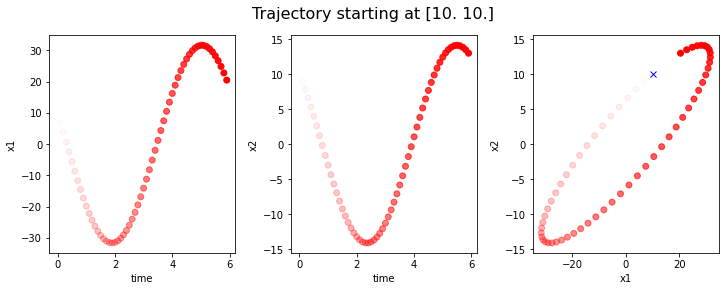

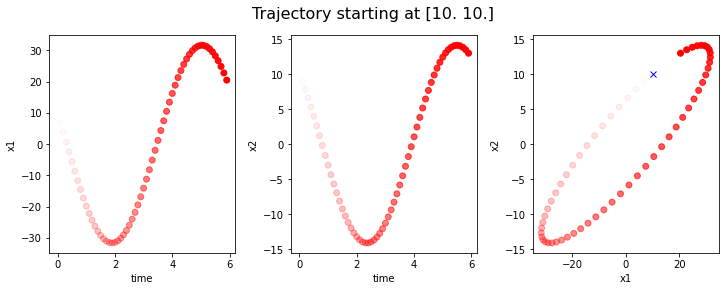

In [0]:
# define a function for our system
def system(t, x, a00, a01, a10, a11):
    '''
    Compute the derivative of the state x at time t for a linear
    differential equation with A matrix [[a00, a01], [a10, a11]].

    Args:
      t (float): time
      x (numpy array): state variable
      a00, a01, a10, a11 (float): parameters of the system

    Returns:
      (numpy array): derivative xdot of state variable x at time t
    '''
    ###################################################################
    ## Insert your code here to fill with the equation for the gaussian
    ################################################################### 

    # SOLUTION
    x1dot = a00 * x[0] + a01 * x[1] # remove later!
    x2dot = a10 * x[0] + a11 * x[1] # remove later!

    return np.array([x1dot, x2dot])


# Here is a list of different A matrices
As = [np.array([[2, -5],
              [1, -2]]),
      np.array([[-1, -1],
               [0, 0.25]]),
      np.array([[3, -2],
               [2, -2]]),
      np.array([[3, -4],
               [1, -1]])]
# Let's start with the first one
A = As[0] ## CHANGE THIS TO TRY OTHER SYSTEMS

# initial conditions; our solution will start at x0
x0s = np.array([[-0.1, 0.2], # first initial condition
                [10,10] # second initial condition
               ])## CHANGE THESE INITIAL CONDITIONS OR ADD SOME MORE!

# parameters
T = 6      # total Time duration
dt = 0.1   # timestep of our simulation

for x in x0s:
    plot_trajectory(system, [A[0,0],A[0,1],A[1,0],A[1,1]], x0, dt=dt, T=T,
                    figtitle='Trajectory starting at '+str(x0))

To get an overview of how initial conditions affect trajectories of a system, we can use a stream plot.

In [0]:
def plot_streamplot(A, figtitle=None):
    '''Show a stream plot for a linear ordinary differential equation with 
    state vector x=[x1,x2].

    Args:
      A (numpy array): 2x2 matrix specifying the dynamical system
      figtitle (string): title for the figure

    Returns:
      nothing, but shows a figure
    '''
    
    # sample 20 x 20 grid uniformly to get x1 and x2
    grid = np.arange(-20, 20, 1)
    x1, x2 = np.meshgrid(grid, grid)

    # calculate x1dot and x2dot at each grid point
    x1dot = A[0,0] * x1 + A[0,1] * x2 
    x2dot = A[1,0] * x1 + A[1,1] * x2

    # make a colormap
    magnitude = np.sqrt(x1dot ** 2 + x2dot ** 2)
    color = 2 * np.log(magnitude) 

    # plot
    fig = plt.figure(figsize=(8, 8))
    plt.streamplot(x1, x2, x1dot, x2dot, color=color, 
                   linewidth=1, cmap=plt.cm.cividis,
                   density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')

    # figure title
    if figtitle is not None:
        plt.title(figtitle, size=16)

    # include principal eigenvector
    if False:
        # get eigenvalues and eigenvectors of A
        lam, v = np.linalg.eig(A)

        # get principal eigenvector of A
        eigenvector1 = v[:,0]

        #print(v)
        #print(lam)

        # plot principal eigenvector
        plt.plot([0, 20*eigenvector1[0]], [0, 20*eigenvector1[1]],
                 linewidth=3, color='r')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


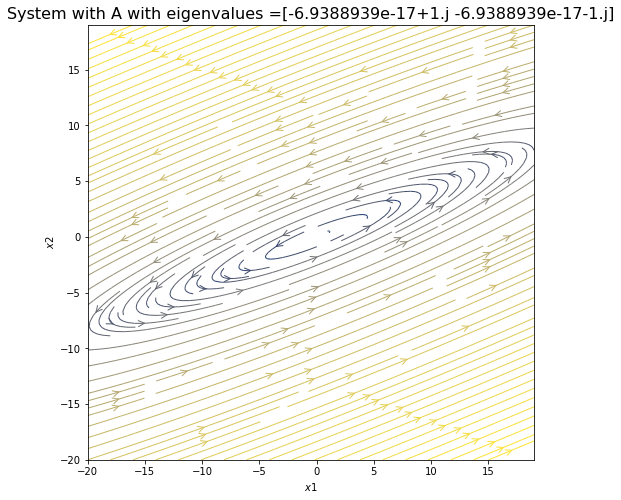

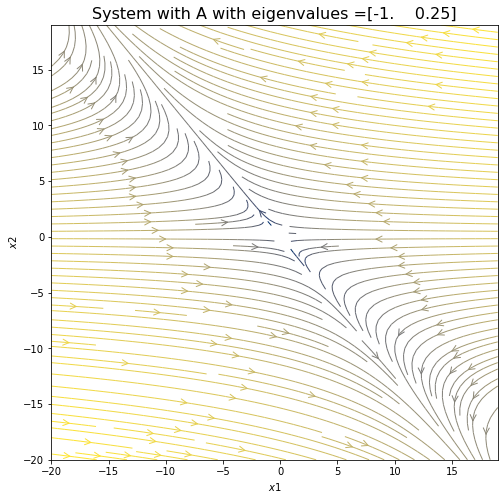

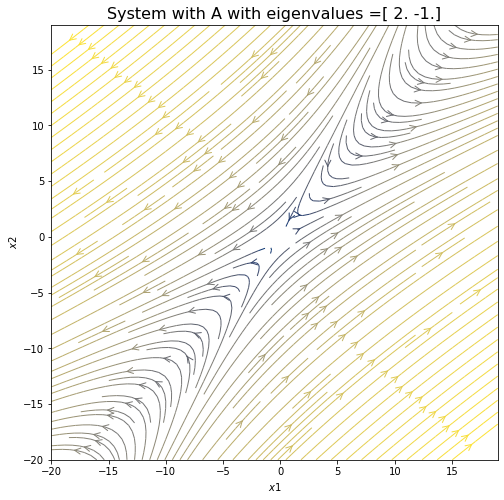

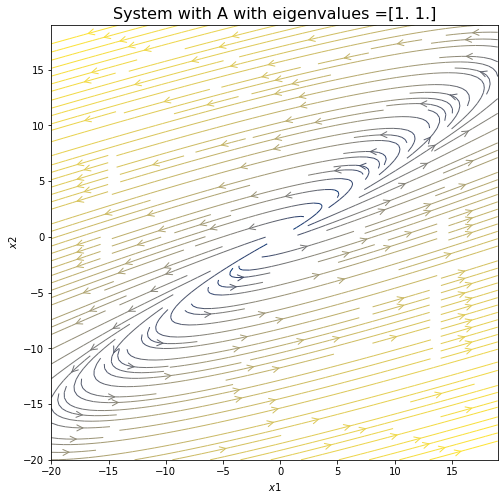

In [0]:
#the A matrices from earlier
As = [np.array([[2, -5],
              [1, -2]]),
      np.array([[-1, -1],
               [0, 0.25]]),
      np.array([[3, -2],
               [2, -2]]),
      np.array([[3, -4],
               [1, -1]])]

# get stream plots for the four different systems
for A in As: 
    # get eigenvalues and eigenvectors
    lam, v = np.linalg.eig(A)

    # plot
    plot_streamplot(A, figtitle='System with A with eigenvalues '+str(lam))

**EXERCISE**: You can change the "plot_streamplot" function so that it plots the principal eigenvector of $A$ as a red line. What is special about the direction in which the principal eigenvector points?

notes to self: Add directions to try on a few other A matrices. Catalogue different dynamics and connect to eigenvalues: sources (unstable node), sinks (stable node), centers. Give a short lecture on this. Note that more complex and interesting behavior appears in higher dimensions and when nonlinearities pop up.

### Tutorial 2: Markov Processes

In this tutorial, we will look at the dynamical systems introduced in the first tutorial through a different lens.

In particular, the differential equations express a relationship between $\dot{x}$ and $x$ at every time $t$, so that the direction of $x$ at _every_ time depends entirely on the value of $x$. Said a different way, knowledge of the value of the state variables $x$ at time t is _all_ the information needed to determine $\dot{x}$ and therefore $x$ at the next time.

This property --- that the present state entirely determines the transition to the next state --- is what defines a **Markov process**. Any system that obeys this property can be described to be **Markovian**.

The goal of Tutorial 2 is to consider this type of Markov process in a simple example, where the transitions are _probablistic_ rather than deterministic. You may sometimes hear these systems called _stochastic_, which just means that the behavior of the system is not entirely deterministic and has some probablistic aspect to it.

####Part A: A telegraph process

So let's consider a Markov process with 2 states, where the switches between each two states is probablistic (known as a telegraph process). To be concrete, let's say we are modeling a sodium ion channel in a neuron that can be in one of two states: Closed (0) or Open (1). 

If the ion channel is Closed, it transitions to Open with probability $P(0 \rightarrow 1 | x = 0) = \mu$. If the ion channel is Open, it transitions to Closed with probability $P(1 \rightarrow 0 | x=1) = \lambda$.

In order to simulate this process of changing states, we use the _Poisson process_. The Poisson process is a way to model discrete events where the average time between event occurrences is known but the exact time of some event is not known. Importantly, the Poisson process dictates the following points: 
1. The probability of some event occurring is _independent from all other events_.
2. The average rate of events within a given time period is constant.
3. Two events cannot occur at the same moment. This is intuitive when we think about an ion channel which can either be in an open or closed state, but not in both simultaneously. 

In the simulation below, we use the Poisson process to model the state of our ion channel at all points $t$ within the total simulation time $T$.  

Text(0, 0.5, 'state of ion channel 0/1')

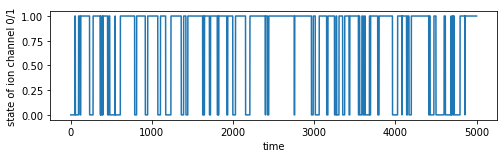

In [0]:
# parameters
T = 5000     # total Time duration
dt = 0.001   # timestep of our simulation


# simulate state of our ion channel in time
# the two parameters that govern transitions are
# c2o: closed to open rate
# o2c: open to closed rate
def ion_channel_opening(c2o, o2c, T, dt):
    # initiatialize variables
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)

    # assume we always start in Closed state
    x[0] = 0 

    # generate a bunch of random uniformly distributed numbers 
    # between zero and unity: [0, 1),
    # one for each dt in our simulation.
    # we will use these random numbers to model the 
    # closed/open transitions
    myrand = np.random.random_sample(size=len(t))
    #myrand = np.arange(len(t))
    
    # walk through time steps of the simulation
    for k in range(len(t)-1):
        # switching between closed/open states are
        # Poisson processes
        if x[k] == 0 and myrand[k] < c2o*dt: # remember to scale by dt!
            x[k+1:] = 1
        elif x[k] == 1 and myrand[k] < o2c*dt:
            x[k+1:] = 0

    return t, x


c2o = 0.04
o2c = 0.01
t, x = ion_channel_opening(c2o, o2c, T, .1)

fig = plt.figure(figsize=(8, 2))
plt.plot(t, x)

plt.xlabel('time')
plt.ylabel('state of ion channel 0/1')

**Exercise:** Try re-running the simulation for different 
probability values of states $c2o$
and $o2c$. \\
Notice how this changes the probability distribution below.

Text(0.5, 1.0, 'mean = 0.780637')

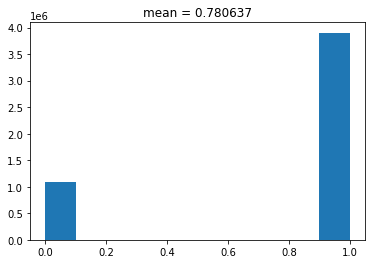

In [0]:
plt.hist(x)
plt.title('mean = {mu:.6f}'.format(mu = x.mean()))

In [0]:
print("Probability of state c2o: %.3f"%(c2o / (c2o + o2c)))

Probability of state c2o: 0.800


Text(0, 0.5, 'cumulative prob of Open')

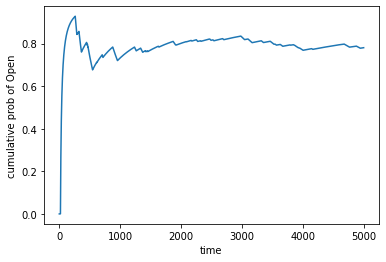

In [0]:
plt.plot(t, np.cumsum(x) / np.arange(1, len(t)+1))
plt.xlabel('time')
plt.ylabel('cumulative prob of Open')

#### Part B: A distributional perspective

We can run this simulation many times and gather empirical distributions of open/closed states. Alternatively, we can formulate the exact same system probablistically, keeping track of the probability of being in each state.

(see diagram in lecture)

The same system of transitions can then be formulated using a vector of 2 elements as the state vector and a dynamics matrix $\mathbf{A}$:

$\left[ \begin{array}{c} C \\ O \end{array} \right]_{k+1} = \mathbf{A} \left[ \begin{array}{c} C \\ O \end{array} \right]_k = \left[ \begin{array} & 1-\mu_{\text{c2o}} & \mu_{\text{c2o}} \\ \mu_{\text{o2c}} & 1-\mu_{\text{o2c}} \end{array} \right] \left[ \begin{array}{c} C \\ O \end{array} \right]_k$.

_Notice_ that this system is written as a discrete step in time, and $\mathbf{A}$ describes the transition, mapping the state from step $k$ to step $k+1$. This is different from what we did in the exercises above where $\mathbf{A}$ had described the function from the state to the time derivative of the state.

Text(0, 0.5, 'prob(open OR closed)')

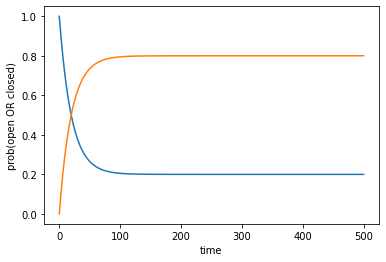

In [0]:
# parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation
t = np.arange(0, T, dt)

# same parameters as above
# c2o: closed to open rate
# o2c: open to closed rate

A = np.array([[1 - c2o*dt, o2c*dt],
              [c2o*dt,     1 - o2c*dt]])
x0 = np.array([[1, 0]])
x = x0

for k in range(len(t)-1):
    x_kp1 = np.dot(A, x[-1,:])
    x = np.vstack((x, x_kp1))
    
plt.plot(t, x)    
plt.xlabel('time')
plt.ylabel('prob(open OR closed)')

Re-calculating our value of the probability of $c2o$ again, we see that this matches the simulation output from before!



In [0]:
print("Probability of state c2o: %.3f"%(c2o / (c2o + o2c)))
x[-1,:]

Probability of state c2o: 0.800


array([0.2, 0.8])

####Part C: Unifying the two perspectives


In [0]:
lam, v = np.linalg.eig(A)
print(lam)
print(v)

[0.995 1.   ]
[[-0.70710678 -0.24253563]
 [ 0.70710678 -0.9701425 ]]


In [0]:
# second eigenvalue is 1, so that's the stable eigenvector
# normalize to unit sum: it's the equilibrium solution
v[:,1] / v[:,1].sum()

array([0.2, 0.8])

###Tutorial 3: Combining determinism and stochasticity

Time-dependent processes rule the world. 

Now that we've spent some time familiarizing ourselves with the behavior of such systems when their trajectories are (1) entirely predictable and deterministic, or (2) governed by random processes, it's time to consider that neither is sufficient to describe neuroscience.

Instead, we are often faced with processes for which we know some dynamics, but there is some random aspect as well. We call these _dynamical systems with stochasticity_.

The goal of this tutorial is to build on our knowledge and gain some intuition for how the two types of dynamics interact.

####Part A: Random walks

To begin, let's first take a wild gander at how life sometimes wanders around aimlessly. One of the simplest and best-studied living systems that has some interesting behaviors is the _E. coli_ bacterium, which is capable of navigating odor gradients on a substrate to seek a food source. Larger life (including flies, dogs, blindfolded humans) are capable of making decisions to accomplish the same behavior using some of the same strategies.

Here, we will consider what the _E. coli_ does in the absence of food odors. What's the best strategy when one does not know where to head? Why, flail around randomly, of course!

The **random walk** is exactly that --- at every time step, use a random process like flipping a coin to change one's heading accordingly. Note that this process is closely related to _Brownian motion_, so you may sometimes hear that terminology used as well.

Let's start with a **one-dimensional random walk**. One bacterium starts at $x=0$. At every time step, it flips a coin (a very small, microscopic coin of protein mintage), then heads left $\Delta x = -1$ or right $\Delta x = +1$ with equal probability.

Text(0, 0.5, 'position x')

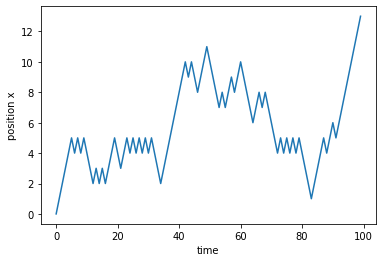

In [0]:
# parameters of simulation
T = 100
t = np.arange(T)
x = np.zeros_like(t)

# initial position
x[0] = 0

# step forward in time
for k in range(len(t)-1):
    # choose randomly between -1 and 1 (coin flip)
    this_step = np.random.choice([-1,1]) 

    # SOLUTION FOR EXERCISE BELOW
    # generate a random number from the standard normal distribution
    # this_step = np.random.standard_normal(1)

    # make the step
    x[k+1] = x[k] + this_step

# plot this trajectory
plt.plot(t, x)
plt.xlabel('time')
plt.ylabel('position x')

So far, we have assumed that the bacterium takes a step of size $1$ at every point in time. Let's let it take steps of different sizes!

**EXERCISE**: Change the code in the cell above so that steps have a standard normal distribution (with mean $0$ and standard deviation $1$).

Whenever we refresh the cell above, we get a different trajectory for our bacterium. What happens if we run this simulation many times? Before we do that, let us rewrite the code so that it simulates a large number of trajectories efficiently:

In [0]:
def random_walk_simulator(T, N, mu=0, sigma=1):
    '''Simulate N random walks for T time points. At each time point, the step
       is drawn from a Gaussian distribution with mean mu and standard deviation
       sigma.

    Args:
      T (integer) : Duration of simulation in time steps
      N (integer) : Number of random walks
      mu (float) : mean of step distribution
      sigma (float) : standard deviation of step distribution

    Returns:
      (numpy array) : NxT array in which each row corresponds to trajectory
    '''
    # generate all the random steps for all steps in all simulations in one go
    # produces a N x T array
    steps = np.random.normal(mu, sigma, size=(N, T))

    # compute the cumulative sum of all the steps over the time axis
    sim = np.cumsum(steps, axis=1)

    return sim

Let's try the random walk simulator!

Text(0, 0.5, 'position x')

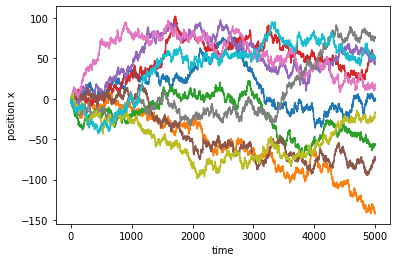

In [0]:
# simulate 1000 random walks for 5000 time steps
sim = random_walk_simulator(5000, 1000, mu=0, sigma=1)

# take a peek at the first 10 simulations:
plt.plot(sim[:10, :].T)
plt.xlabel('time')
plt.ylabel('position x')

We see that the trajectories all look a little different from each other. But there are general observations that one can make: At the beginning almost all trajectories are very close to $0$, which is where our bacterium started. As time progresses, some trajectories move further and further away from the starting point. However, a lot of trajectories stay close to the starting point. 

Let's look at the distribution of positions of bacteria at different points in time.

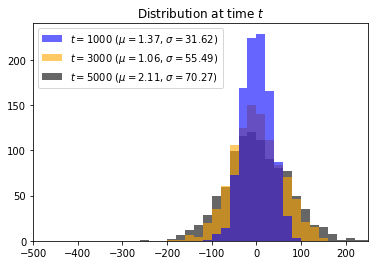

In [0]:
# look at the distribution of positions at different times
for i, t in enumerate([1000,3000,5000]):

    # get mean and standard deviation of distribution at time t
    mu = sim[:, t-1].mean()
    sig2 = sim[:, t-1].std()
    
    # make a plot label
    mytitle = '$t=${time:d} ($\mu=${mu:.2f}, $\sigma=${var:.2f})'
    
    # plot histogram
    plt.hist(sim[:,t-1], 
             color=['blue','orange','black'][i],
             #make sure the histograms have the same bins!
             bins=np.arange(-300,300,20), 
             # make histograms a little see-through
             alpha=0.6, 
             # draw second histogram behind the first one
             zorder=3-i, 
             label=mytitle.format(time=t, mu=mu, var=sig2))
    
    # plot range
    plt.xlim([-500, 250])

    # add legend
    plt.legend(loc=2)
    
    # add title
    plt.title(r'Distribution at time $t$')

At the beginning of the simulation, the distribution of positions is sharply peaked about $0$. As timeprogresses, the distribution becomes wider but its center stays closer to $0$. In other words, the mean of the distribution is independent of time, but the variance and standard deviation of the distribution scales with time. Such a process is called a **diffusive process**.

Below, we plot the mean and variance of our bacterium's random walk as a function of time.

[Text(0, 0.5, 'variance')]

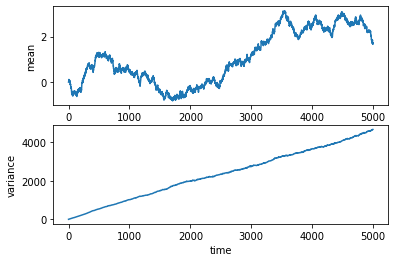

In [0]:
# simulate random walks
sim = random_walk_simulator(5000, 1000, mu=0, sigma=1)

# get mean and variance at every time point
mu = np.mean(sim, axis=0)
var = np.var(sim, axis=0)

#  make a figure
fig, (ah1, ah2) = plt.subplots(2)

# plot mean of distribution as a function of time
ah1.plot(mu)
ah1.set(ylabel='mean')

# plot variance of distribution as a function of time
ah2.plot(var)
ah2.set(xlabel='time')
ah2.set(ylabel='variance')

**EXERCISE**: How do the parameters $\mu$ and $\sigma$ of the Gaussian distribution from which we choose the steps affect the mean and variance of the bacterium's random walk?

####Part B: The Ornstein-Uhlenbeck (OU) process

The random walk process we just explored is diffusive, and the distribution of possible trajectories _spreads_, taking on increasing variance with time. Even so, at least in one dimension, the mean remains close to the initial value (in the example above, 0).

Our goal is now to build on this model to construct a **drift-diffusion** model, popular model for memory, which as we all know, is imperfect. 

To build such a model, let's combine the random walk model with the first differential equations we explored in Tutorial 1 earlier. Though those models had been written in continuous time as $\dot{x} = a x$, here let's consider the discrete version of the same system and write:

$x_{k+1} = \lambda x_k$,

whose solution can be written as

$x_k = x_0 \lambda^k$,

where $x_0$ is the value of $x$ at time $t=0$.

Text(0, 0.5, 'x')

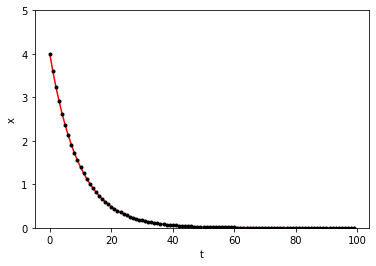

In [0]:
# parameters
lam = 0.9
T = 100      # total Time duration in steps
x0 = 4.     # initial condition of x at time 0

# initiatialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = lam * x[k]

# plot x as it evolves in time 
plt.plot(t, x0 * lam**t, 'r') # analytic solution
plt.plot(t, x, 'k.')          # simulated data pts
plt.ylim(0, x0+1)

plt.xlabel('t')
plt.ylabel('x')

Notice that this process decays towards position $x=0$. We can make it decay towards any position by adding another parameter $x_\infty$. The rate of decay is proportional to the difference between $x$ and $x_\infty$. 

We have to modify our analytic solution slightly to take this into account:

$x_k = x_\infty(1 - \lambda^k) + x_0 \lambda^k$.


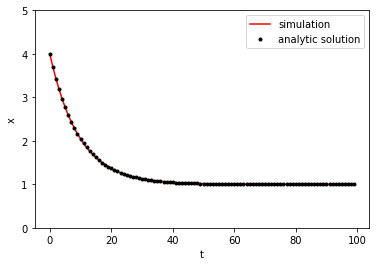

In [0]:
# parameters
lam = 0.9    # decay rate
T = 100      # total Time duration in steps
x0 = 4.      # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# initiatialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = xinfty + lam * (x[k] - xinfty)

# plot x as it evolves in time 
plt.plot(t, xinfty + (x0 - xinfty) * lam**t, 'r') # analytic solution
plt.plot(t, x, 'k.')          # simulated data pts
plt.ylim(0, x0+1)

plt.xlabel('t')
plt.ylabel('x')

plt.legend({'analytic solution', 'simulation'})

Now we are ready to take this basic, deterministic difference equation and add a diffusion process on top of it! Fun times in Python land.

As a point of terminology: this type of process is commonly known as a **drift-diffusion model** or **Ornstein-Uhlenbeck (OU) process**. You may sometimes see them written as continuous stochastic differential equations, but here we are doing the discrete version to maintain continuity in the tutorial.

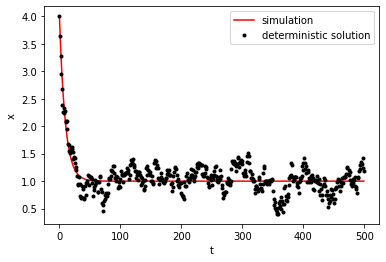

In [0]:
# parameters
lam = 0.9    # decay rate
sig = 0.1   # standard deviation of diffusive process
T = 500      # total Time duration in steps
x0 = 4.      # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# initiatialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)

# plot x as it evolves in time 
# mean follows the analytic solution for deterministic part
plt.plot(t, xinfty * (1 - lam**t) + x0 * lam**t, 'r') 
plt.plot(t, x, 'k.')          # simulated data pts

plt.xlabel('t')
plt.ylabel('x')

plt.legend({'deterministic solution', 'simulation'})

####Part C: Variance of the OU process

As we can see, the **mean** of the process follows the solution to the deterministic part of the governing equation. So far, so good!

But what about the **variance**? 

Unlike the random walk, because there's a decay process that "pulls" $x$ back towards $x_\infty$, the variance does not grow without bound with large $t$. Instead, when it gets far from $x_\infty$, the position of $x$ is restored, until an equilibrium is reached.

The equilibrium variance for our drift-diffusion system is

Var $= \frac{\sigma^2}{2 (1 - \lambda)}$.

Notice that the value of this equilibrium variance depends on $\lambda$ and $\sigma$. It does not depend on $x_0$ and $x_\infty$.

In [0]:
# drift-diffusion model
# returns t, x
def ddm(T, x0, xinfty, lam, sig):
    t = np.arange(0, T, 1.)
    x = np.zeros_like(t)
    x[0] = x0

    for k in range(len(t)-1):
        x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)

    return t, x

# computes equilibrium variance of ddm
# returns variance
def ddm_eq_var(T, x0, xinfty, lam, sig):
    t, x = ddm(T, x0, xinfty, lam, sig)

    # returns variance of the second half of the simulation
    # this is a hack: assumes system has settled by second half
    return x[-round(T/2):].var()

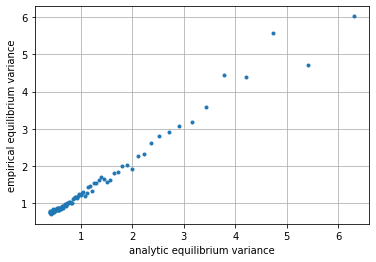

In [0]:
# sweep through values for lambda
lambdas = np.arange(0.05, 0.95, 0.01)
variances = np.zeros_like(lambdas)
sig = 0.87

# compute empirical equilibrium variance
for i in range(len(lambdas)):
    variances[i] = ddm_eq_var(5000, x0, xinfty, lambdas[i], sig)

plt.plot(sig**2 / 2 / (1 - lambdas), variances, '.')

plt.xlabel('analytic equilibrium variance')
plt.ylabel('empirical equilibrium variance')

plt.grid(True)

###Tutorial 4: Autoregressive models

The goal of this tutorial is to use the modeling tools and intuitions developed in the previous few tutorials and use them to _fit data_. The concept is to flip the previous tutorial -- instead of generating synthetic data points from a known underlying process, what if we are given data points and have to learn the underlying process?

####Part A: Fitting data from the OU process

To see how this works, let's continue the previous example with the drift-diffusion (OU) process. 

For simplity, we set $x_\infty = 0$.

Text(0, 0.5, 'position x')

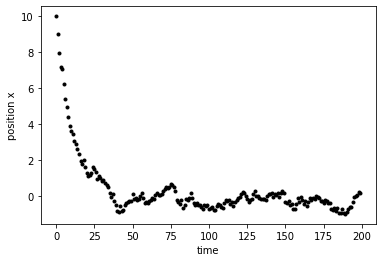

In [0]:
# parameters
T = 200
x0 = 10
xinfty = 0
lam = 0.9
sig = 0.2

t, x = ddm(T, x0, xinfty, lam, sig)

plt.plot(t, x, 'k.')
plt.xlabel('time')
plt.ylabel('position x')


What if we were given these positions $x$ as they evolve in time as data, how would we back out the dynamics of the system $\lambda$? 

Since a little bird told us that this system takes on the form

$x_{k+1} = \lambda x_k + \eta$,

where $\eta$ is noise from a normal distribution, our approach is solve for $\lambda$ as a **regression problem**.

Text(0, 0.5, '$x_{k+1}$')

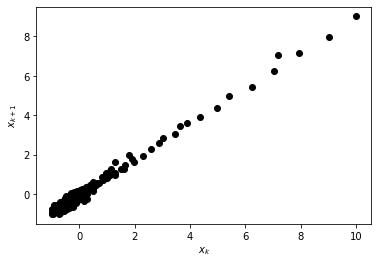

In [0]:
# make a scatter plot of every data point in x
# at time k versus time k+1
plt.scatter(x[0:-2], x[1:-1], color='k')
plt.xlabel('$x_k$')
plt.ylabel('$x_{k+1}$')


Hooray, it's a line! This is evidence that that the _dynamics that generated the data_ is **linear**. We can now reformulate this task as a regression problem

$\mathbf{x}_{1:T} = \lambda \mathbf{x}_{0:T-1}$,

where the $\mathbf{x}$ vectors are the vectors of the data indexed so that they are shifted in time by one. 

This model is **autoregressive**, where _auto_ means self. In other words, it's a regression of the timeseries on itself from the past. The equation as written above is only a function of itself from _one step_ in the past, so we can call it a _first order_ autoregressive model.

Text(0.5, 1.0, 'True $\\lambda$ = 0.9000, Estimate $\\lambda$ = 0.9075')

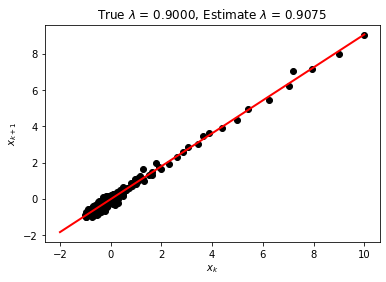

In [0]:
# build the two data vectors from x
x1 = x[0:-2]
x1 = x1[:, np.newaxis]**[0, 1]

x2 = x[1:-1]

# solve for an estimate of lambda as a linear regression problem
p, res, rnk, s = np.linalg.lstsq(x1, x2, rcond=None)

# here we've artificially added a vector of 1's to the x1 array,
# so that our linear regression problem has an intercept term to fit.
# we expect this coefficient to be close to 0.
# the second coefficient in the regression is the linear term:
# that's the one we're after!
lam_hat = p[1]

# plot the data points
plt.scatter(x[0:-2], x[1:-1], color='k')
plt.xlabel('$x_k$')
plt.ylabel('$x_{k+1}$')

# plot the regression line on top
xx = np.linspace(-sig*10, max(x), 100)
yy = p[0] + lam_hat * xx
plt.plot(xx, yy, 'r', linewidth=2)

mytitle = 'True $\lambda$ = {lam:.4f}, Estimate $\lambda$ = {lam_hat:.4f}'
plt.title(mytitle.format(lam=lam, lam_hat=lam_hat))

Pretty cool! So now we have a way to predict $x_{k+1}$ if given any data point $x_k$. Let's take a look at how accurate this one-step prediction might be by plotting the residuals.

Text(0.5, 1.0, 'stdev of errors = 0.1785')

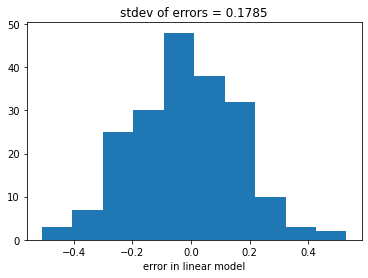

In [0]:
res = x2 - (lam_hat * x[0:-2])

plt.hist(res)
plt.xlabel('error in linear model')
plt.title('stdev of errors = {std:.4f}'.format(std=res.std()))

####Part B: Higher order autoregressive models

Now that we have established the autoregressive framework, generalizing for dependence on data points from the past is straightfoward. **Higher order** autoregression models a future time point based on _more than one points in the past_.

In one dimension, we can write such an order-$r$ model as

$x_{k+1} = \alpha_0 + \alpha_1 x_k + \alpha_2 x_{k-1} + \alpha_3 x_{k-2} + \dots + \alpha_{r+1} x_{k-r}$,

where the $\alpha$'s are the $r+1$ coefficients to be fit to the data available.



These models are useful to account for some **history dependence** in the trajectory of timeseries. This next part of the tutorial will explore one such timeseries, and you can do an experiment on ourselves!

In particular, we will explore a binary random sequence of 0's and 1's that would occur if you flipped a coin and jotted down the flips. 

The difference is that, instead of actually flipping a coin (or using code to generate such a sequence), you -- yes you, human -- are going to generate such a random Bernoulli sequence as best as you can by typing in 0's and 1's. We will then build higher-order AR models to see if we can identify predictable patterns in the time-history of digits you generate.

**But first**, let's try this on a sequence with a simple pattern, just to make sure the framework is functional.

Text(0, 0.5, 'random variable')

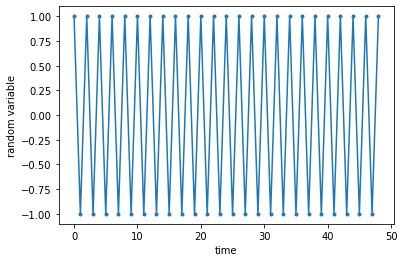

In [0]:
#monkey_at_typewriter = '1010101010101010101010101010101010101010101010101010101\
#                        01010101010101010101010101010101010' 

# this sequence is entirely predictable, so an AR model should work       
monkey_at_typewriter = '1010101010101010101010101010101010101010101010101'                  
#monkey_at_typewriter = '100100100100100100100100100100100100100'

# function to turn chars to numpy array, 
# coding it this way makes the math easier
# '0' -> -1
# '1' -> +1
def char2array(s):
    m = [int(c) for c in s]
    x = np.array(m)
    return x*2 - 1

x = char2array(monkey_at_typewriter)    

plt.plot(x, '.-')
plt.xlabel('time')
plt.ylabel('random variable')

In [0]:
# build the two data vectors from x
x1 = x[0:-2]
x1 = x1[:, np.newaxis]**[0, 1]

x2 = x[1:-1]

# solve for an estimate of lambda as a linear regression problem
p, res, rnk, s = np.linalg.lstsq(x1, x2, rcond=None)

In [0]:
# this works for alternating characters!
# x_k+1 = 0 - x_k
print('alpha_0 = {a0:.2f}, alpha_1 = {a1:.2f}'.format(a0=p[0], a1=p[1]))

alpha_0 = -0.00, alpha_1 = -1.00


Now we can define a few functions for building the data matrices so that we can proceed to solving the autoregressive problem.

In [0]:
def build_time_delay_matrices(x, r):
    # construct the time-delayed data matrices for order-r AR model
    x1 = np.ones(len(x)-r)
    x1 = np.vstack((x1, x[0:-r]))
    xprime = x
    for i in range(r-1):
        xprime = np.roll(xprime, -1)
        x1 = np.vstack((x1, xprime[0:-r]))
    
    x2 = x[r:]

    return x1, x2

def AR_model(x, r):
    x1, x2 = build_time_delay_matrices(x, r)

    # solve for an estimate of lambda as a linear regression problem
    p, res, rnk, s = np.linalg.lstsq(x1.T, x2, rcond=None)

    return x1, x2, p

def AR_prediction(x_test, p):    
    x1, x2 = build_time_delay_matrices(x_test, len(p)-1)

    return np.sign(np.dot(x1.T, p))

def error_rate(x_test, p):
    x1, x2 = build_time_delay_matrices(x_test, len(p)-1)
    
    return np.count_nonzero(x2 - AR_prediction(x_test, p)) / len(x2)

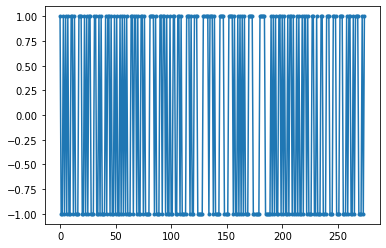

In [0]:
# data generated by 9-yr-ld JAB:
monkey_at_typewriter = '10010101001101000111001010110001100101000101101001010010101010001101101001101000011110100011011010010011001101000011101001110000011111011101000011110000111101001010101000111100000011111000001010100110101001011010010100101101000110010001100011100011100011100010110010111000101'
test_monkey = '00100101100001101001100111100101011100101011101001010101000010110101001010100011110'

# testing: machine generated randint should be entirely unpredictable
#x = np.random.randint(2, size=500)

x = char2array(monkey_at_typewriter)    
test = char2array(test_monkey)

plt.plot(x, '.-')

In [0]:
r = 6
x1, x2, p = AR_model(x, r)
print(p)

[-0.12194932 -0.12553268 -0.19535905 -0.31840051 -0.21813968 -0.12433094
 -0.22193268]


Text(0, 0.5, 'estimated x')

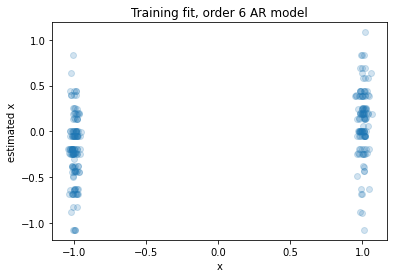

In [0]:
plt.scatter(x2+np.random.standard_normal(len(x2))*0.02, 
            np.dot(x1.T, p), alpha=0.2)
plt.title('Training fit, order {r:d} AR model'.format(r=r))

plt.xlabel('x')
plt.ylabel('estimated x')

In [0]:
error_rate(x, p)

0.29739776951672864

Text(0, 0.5, 'estimated x')

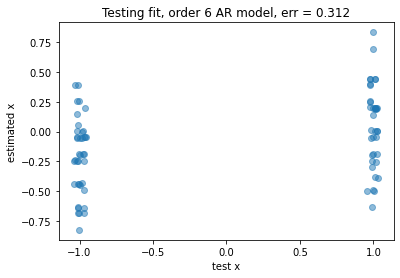

In [0]:
x1_test, x2_test = build_time_delay_matrices(test, r)
plt.scatter(x2_test+np.random.standard_normal(len(x2_test))*0.02, 
            np.dot(x1_test.T, p), alpha=0.5)

mytitle = 'Testing fit, order {r:d} AR model, err = {err:.3f}'
plt.title(mytitle.format(r=r, err=error_rate(test, p)))

plt.xlabel('test x')
plt.ylabel('estimated x')

In [0]:
r = np.arange(1, 20)
err = np.ones_like(r) * 1.0

for i, rr in enumerate(r):
    x1, x2, p = AR_model(x, rr)

    test_error = error_rate(test, p)

    err[i] = test_error

Text(0, 0.5, 'Test error')

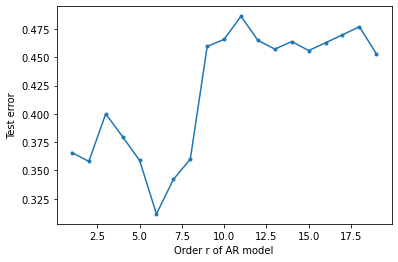

In [0]:
plt.plot(r, err, '.-')
plt.xlabel('Order r of AR model')
plt.ylabel('Test error')

Notice that there's a sweet spot in the test error! The 6th order AR model does a really good job here, and for larger $r$'s, the model starts to overfit the training data and does not do well on the test data.

In summary:

"**I can't believe I'm so predictable!**" - JAB